In [174]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [175]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_7165/MAML+Arbiter_5way_5shot_inner_loop.csv')
# norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

In [176]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [177]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()

In [178]:
norm_info_train['gr_mean1'] = norm_info_train['layer_dict.conv1.conv.weight_grad_mean'] * norm_info_train['layer_dict.conv1.conv.weight_alpha'] / norm_info_train['layer_dict.conv1.conv.weight_grad_L2norm']
norm_info_train['gr_mean2'] = norm_info_train['layer_dict.conv2.conv.weight_grad_mean'] * norm_info_train['layer_dict.conv2.conv.weight_alpha'] / norm_info_train['layer_dict.conv2.conv.weight_grad_L2norm']
norm_info_train['gr_mean3'] = norm_info_train['layer_dict.conv3.conv.weight_grad_mean'] * norm_info_train['layer_dict.conv3.conv.weight_alpha'] / norm_info_train['layer_dict.conv3.conv.weight_grad_L2norm']





norm_info_train['gr_var1'] = norm_info_train['layer_dict.conv1.conv.weight_grad_var'] * norm_info_train['layer_dict.conv1.conv.weight_alpha'] * norm_info_train['layer_dict.conv1.conv.weight_alpha'] / norm_info_train['layer_dict.conv1.conv.weight_grad_L2norm'] * norm_info_train['layer_dict.conv1.conv.weight_grad_L2norm']
norm_info_train['gr_var2'] = norm_info_train['layer_dict.conv2.conv.weight_grad_var'] * norm_info_train['layer_dict.conv2.conv.weight_alpha'] * norm_info_train['layer_dict.conv2.conv.weight_alpha'] / norm_info_train['layer_dict.conv2.conv.weight_grad_L2norm'] * norm_info_train['layer_dict.conv2.conv.weight_grad_L2norm']
norm_info_train['gr_var3'] = norm_info_train['layer_dict.conv3.conv.weight_grad_var'] * norm_info_train['layer_dict.conv3.conv.weight_alpha'] * norm_info_train['layer_dict.conv3.conv.weight_alpha']/ norm_info_train['layer_dict.conv3.conv.weight_grad_L2norm'] * norm_info_train['layer_dict.conv3.conv.weight_grad_L2norm']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JM\anaconda3\envs\maml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JM\anaconda3\envs\maml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [179]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,layer_dict.linear.bias_alpha,gr_mean1,gr_mean2,gr_mean3,gr_var1,gr_var2,gr_var3
0,0,train,0,0.001040,803.467407,20.919369,0.126662,-0.000919,124.344971,2.431108,...,0.000000,0.000000,0.000000e+00,1.035130e+00,-5.623461e-05,-0.000069,0.000058,4.044300e-04,0.000829,0.000532
5,0,train,0,-0.003932,670.802124,16.511274,0.078891,-0.000919,124.344971,2.431108,...,0.000000,0.000000,0.000000e+00,1.023365e+00,-2.425883e-05,-0.000030,-0.000053,2.935803e-04,0.000585,0.000395
10,1,train,0,-0.025649,695.282043,19.999615,0.115112,-0.000922,124.347656,2.431154,...,0.000500,0.000224,7.999998e-09,1.047816e+00,-4.879664e-05,-0.000045,0.000051,3.575399e-04,0.000646,0.000364
15,1,train,0,0.005949,721.667969,18.644739,0.100580,-0.000922,124.347656,2.431154,...,0.000500,0.000224,7.999998e-09,1.047698e+00,4.411062e-05,-0.000059,0.000034,3.396657e-04,0.000584,0.000330
20,2,train,0,-0.028568,594.156372,15.215840,0.066194,-0.000921,124.345581,2.431116,...,0.000940,0.000422,2.949922e-08,1.048969e+00,-3.944622e-05,-0.000022,-0.000009,2.541157e-04,0.000512,0.000227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196975,74997,train,0,0.005059,178.148651,5.151736,0.007656,-0.000454,141.786926,2.885570,...,0.020180,0.012414,3.056021e-05,1.269019e-10,1.034863e-15,0.000089,-0.000482,1.247543e-26,0.000159,0.050315
1196980,74998,train,0,0.006869,175.523529,4.566458,0.005988,-0.000453,141.788147,2.885574,...,0.020159,0.012391,3.042942e-05,1.362708e-10,-6.173367e-15,-0.000112,0.002330,1.560368e-26,0.000169,0.041362
1196985,74998,train,0,0.009940,196.325043,5.577432,0.008905,-0.000453,141.788147,2.885574,...,0.020159,0.012391,3.042942e-05,1.131704e-10,6.551475e-15,-0.000015,0.001338,9.406327e-27,0.000169,0.050031
1196990,74999,train,0,0.005141,160.181061,4.471992,0.005762,-0.000453,141.789246,2.885580,...,0.020137,0.012368,3.029384e-05,1.363979e-10,-1.812810e-15,-0.000128,0.000445,1.546881e-26,0.000154,0.047017


In [180]:
gr = specific_column_values.groupby('current_iter').mean()

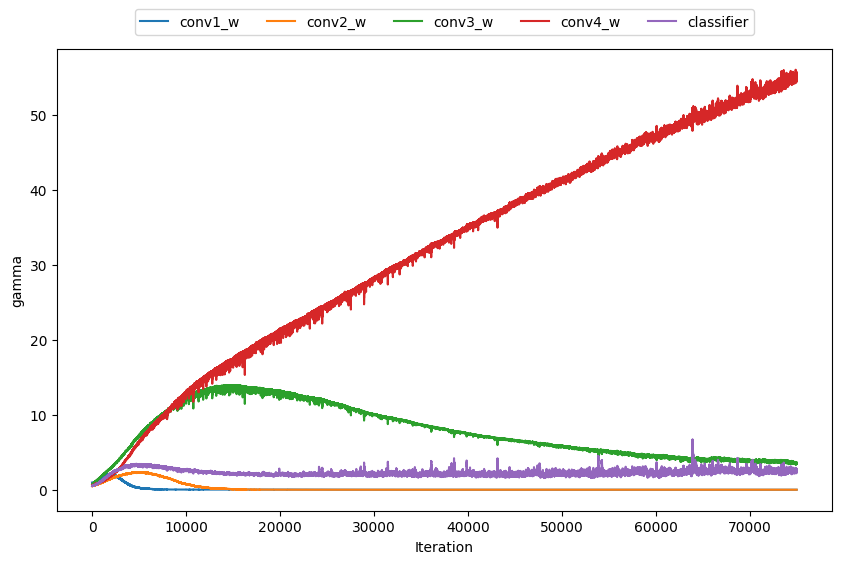

In [181]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


#plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

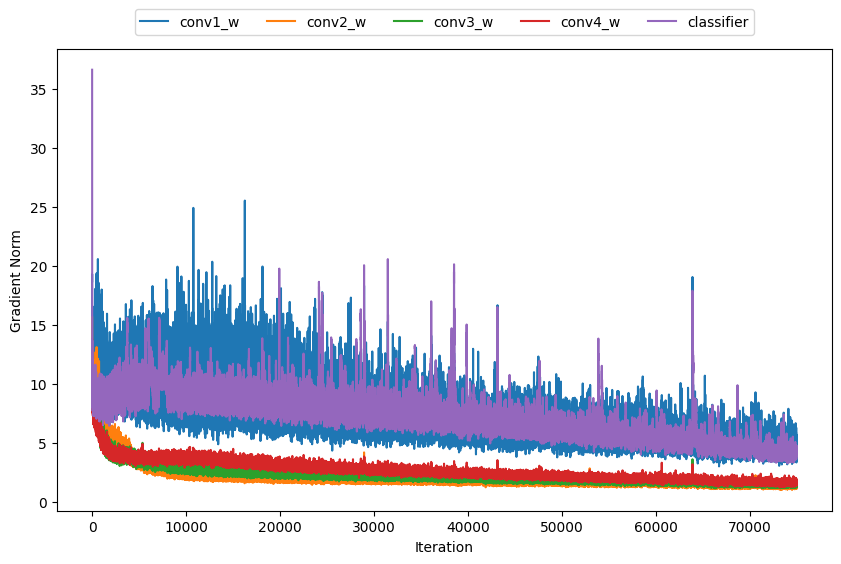

In [182]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

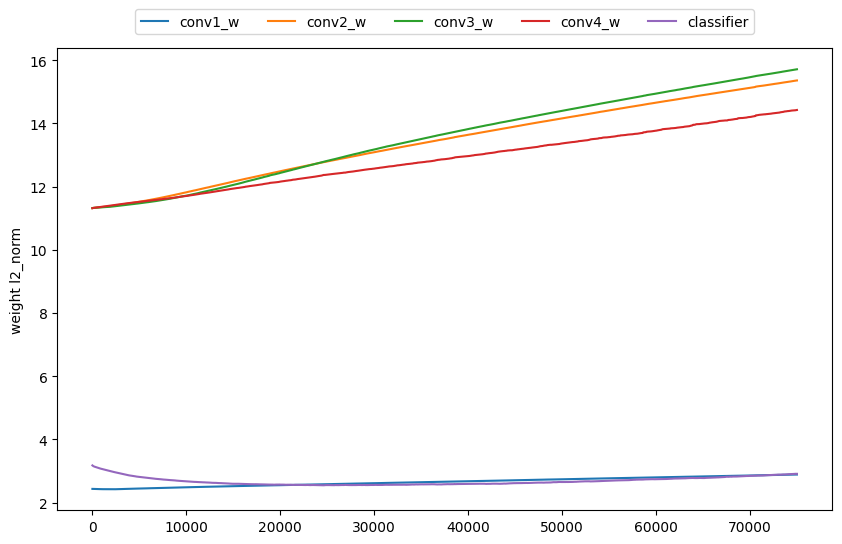

In [183]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

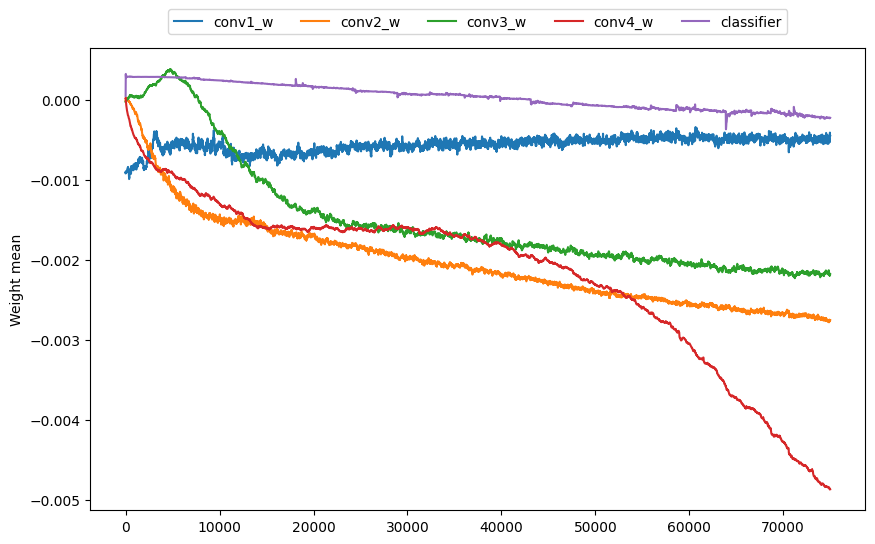

In [184]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

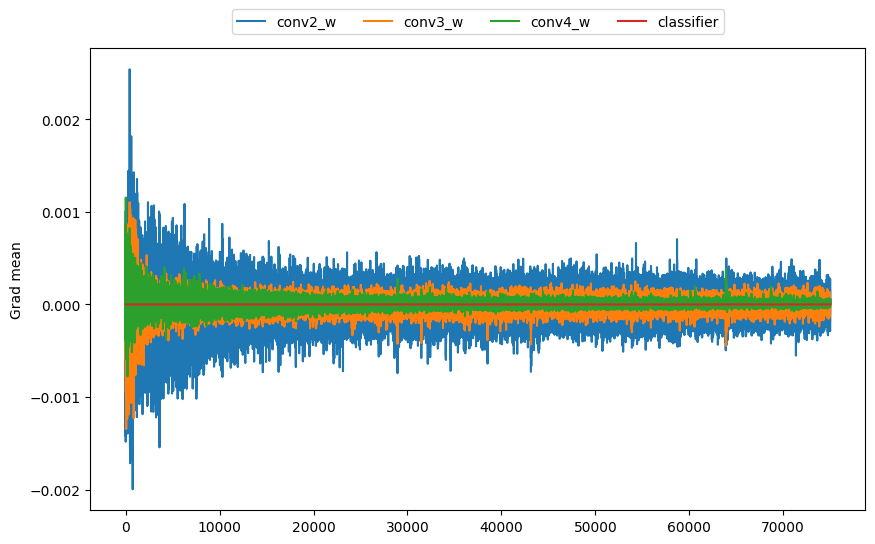

In [185]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ #'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = [#'conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# plt.yscale('log', base=10)


plt.show()  # 그래프 보여주기

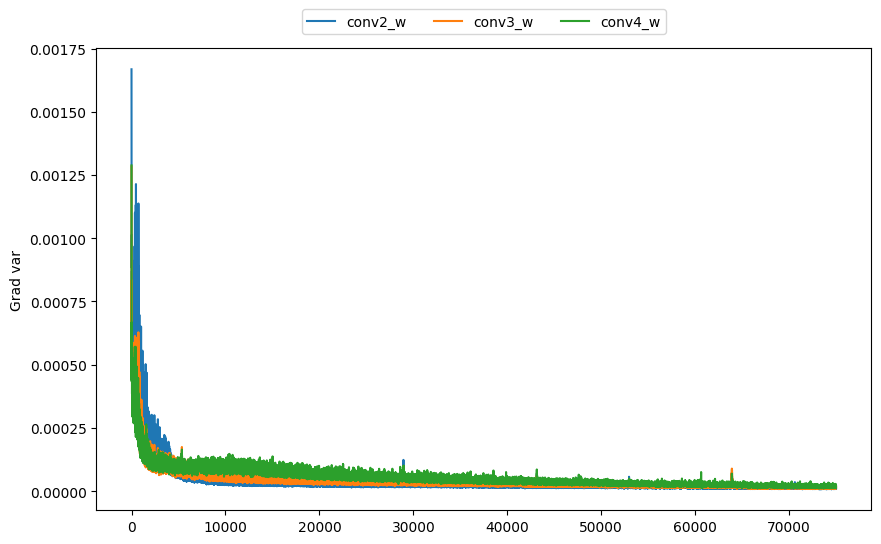

In [186]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ #'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    #'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = [#'conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         #'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.yscale('log', base=10)


plt.show()  # 그래프 보여주기

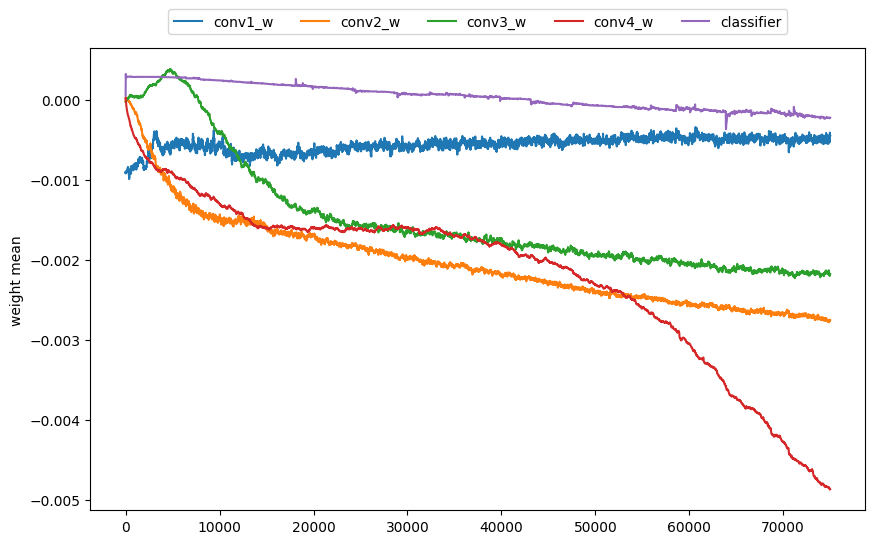

In [187]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

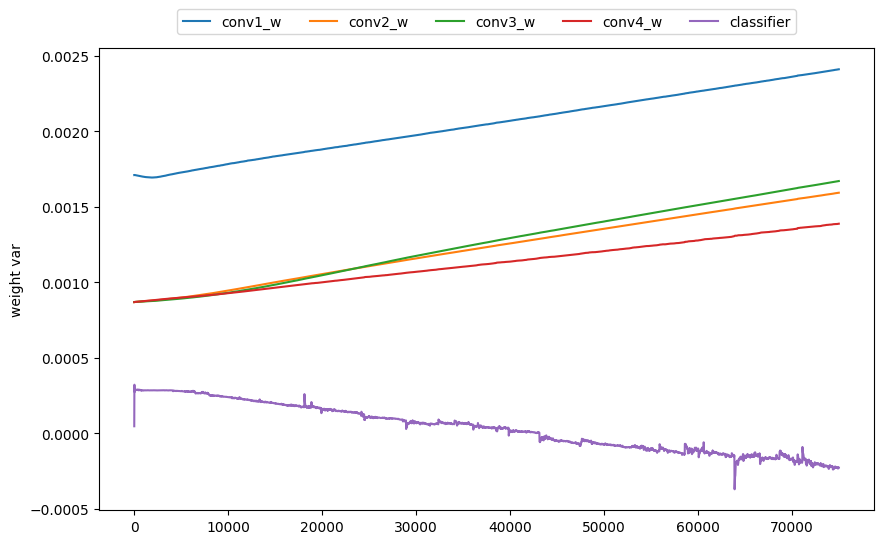

In [188]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

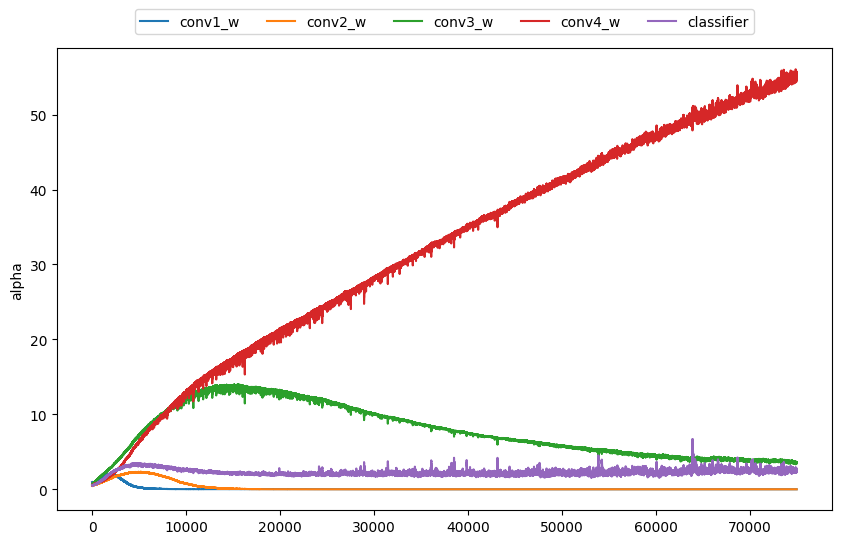

In [189]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

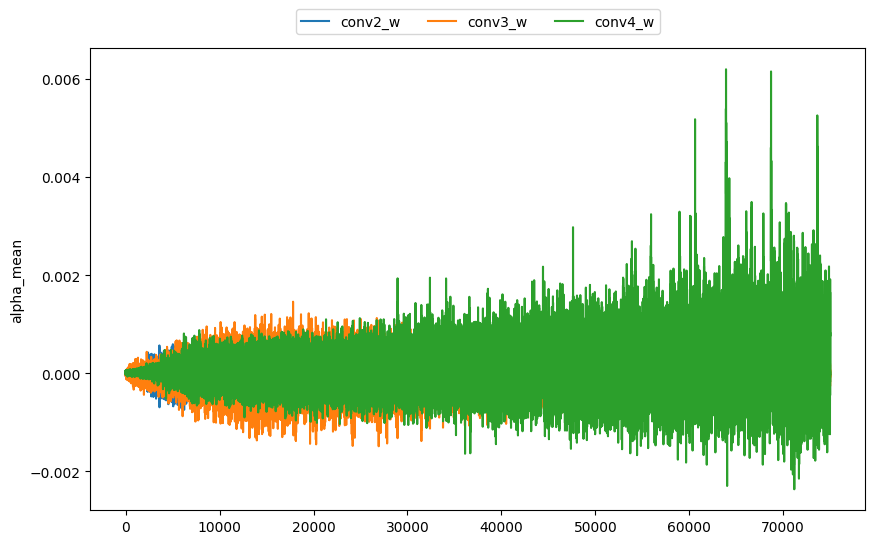

In [190]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'gr_mean1', 
                    'gr_mean2', 
                    'gr_mean3'
                  ]
columns_to_plot_label = ['conv2_w', 
                         'conv3_w', 
                         'conv4_w'
                        ]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha_mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

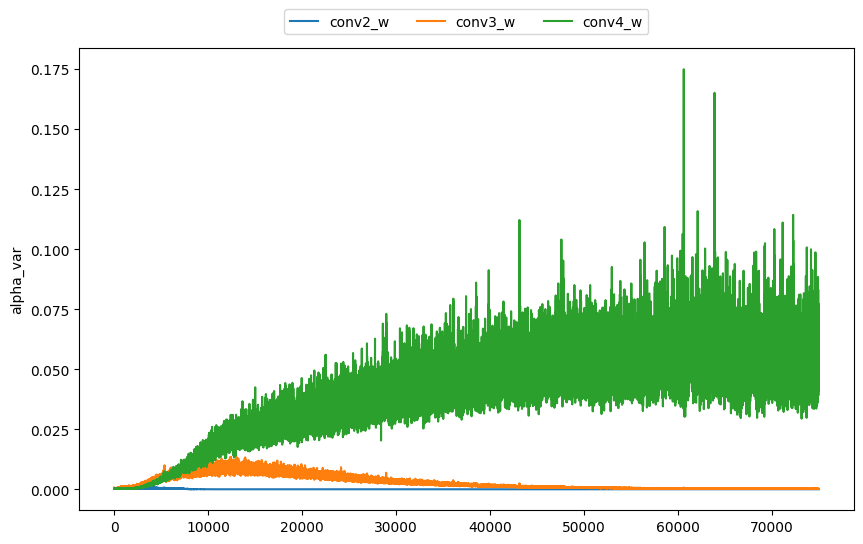

In [191]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'gr_var1', 
                    'gr_var2', 
                    'gr_var3'
                  ]
columns_to_plot_label = ['conv2_w', 
                         'conv3_w', 
                         'conv4_w'
                        ]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha_var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기